In [3]:
from art_skills.wSL_trajectory_generator import TrajectoryGenerator
from art_skills.wSL_stroke_generator import StrokeGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.constrained_layout.use'] = True

# py.offline.init_notebook_mode(connected=True)

In [4]:
# GTSAM SLN Unit Testing
parameters = {"dt": 0.01, 
              "t_points": np.array([[0,0], [50, 50]]).T,
              "delta": np.array([0.3]),
              "Ac": np.array([0.05]),
              "delta_t": np.array([0.0]), 
              "T": 0.3}

# parameters = {"dt": 0.01,
#               "t_points": np.array([[0, 0], [-50, 100], [100, 70], [-40, 120]]).T,
#               "delta": np.array([0.3, 0.3, 0.3]),
#               "Ac": np.array([0.05, 0.05, 0.05]),
#               "delta_t": np.array([0.4, 0.4, 0.4]),
#               "T": 0.3}

strokegen = StrokeGenerator()
sigma = strokegen.sigma(parameters["Ac"])
mu = strokegen.mu(sigma, parameters["T"])
t0, t = strokegen.t0_t(parameters["dt"], sigma,
                       mu, parameters["T"], parameters["delta_t"])
D, D_adj, theta, theta_0 = strokegen.D_theta(
    parameters["t_points"], parameters["delta"])

for i in range(len(t0)):
    print(str(round(t0[i], 3)) + ',', str(round(D[i], 3)) + ',', str(round(theta_0[i], 3)) + ',',
          str(round(theta_0[i]+theta[i], 3)) + ',', str(round(sigma[i], 3)) + ',', str(round(mu[i], 3)) + ';')
print('__________________')

# Berio Code
# parameters = {"dt": 0.01,
#                 "t_points": np.array([[0,0], [-50, 100], [100,70], [-40, 120]]).T,
#                 "delta": np.array([0.3, 0.3, 0.3]),
#                 "Ac": np.array([0.05, 0.05, 0.05]),
#                 "delta_t": np.array([0.4, 0.4, 0.4]),
#                 "T": 0.3}
# note: period is for each stroke, with endtime being calculated as t0[0] + t[-1] + period

# Letter G
# parameters = {"dt": 0.01,
#               "t_points": np.array([[0,0], [-100,100], [-200,-100], [-100,-300], [0,-100], [-100,-100]]).T,
#               "delta": np.array([0.4, 0.4, 0.4, 0.4, 0.4]),
#               "Ac": np.array([0.05, 0.05, 0.05, 0.05, 0.05]),
#               "delta_t": np.array([0.3, 0.3, 0.3, 0.3, 0.7]),
#               "T": 0.8}

# Fig 8. Djioua08EPM
#parameters = {"dt": 0.01, "t_points": np.array([[25,18], [6,4], [8,5.5]]).T, "delta": np.array([-0.5, 0.5]), "Ac": np.array([0.043949, 0.1082468]), "delta_t": np.array([0, 0]), "T": 0.4}
#parameters = {"dt": 0.01, "t_points": np.array([[25,18], [6,4], [8,5.5]]), "delta": [-0.5, 0.5], "Ac": [0.043949, 0.1082468], "delta_t": [0, 0], "T": [0.5, 0.2]}

t_points = parameters["t_points"]
trajectory_generator = TrajectoryGenerator(**parameters)
trajectory, strokes = trajectory_generator.generate_trajectory()
maxima = trajectory_generator.extract_strokes()

# print(trajectory)

# print(maxima)

velocity = trajectory_generator.velocity()
#SL = np.multiply(velocity[0:5], 1/D[0][0])
# print(SL)

# timeval = round(0.01, 2)
# index = np.where(t == timeval)
# ptx = trajectory[0, index[0]]
# print("unit x1", ptx)
# timeval = round(0.4, 2)
# index = np.where(t == timeval)
# ptx = trajectory[0, index[0]]
# print("unit x2", ptx)

px=[]
py=[]
tm=[]
v=[]
for i in range(5):
    timeval = round(0.05*(i+1), 2)
    index = np.where(t == timeval)
    ptx = trajectory[0, index[0]][0]
    pty = trajectory[1, index[0]][0]
    v.append(velocity[index[0]])
    px.append(ptx)
    py.append(pty)
    tm.append(timeval)
    print(str(timeval) + ',', str(ptx) + ',', str(pty) + ',')
print("px", px)
print("py", py)
# for i in range(5):
#     timeval = round(0.19 + 0.02*(i+1), 2)
#     index = np.where(t == timeval)
#     ptx = trajectory[0, index[0]][0]
#     pty = trajectory[1, index[0]][0]
#     v.append(velocity[index[0]])
#     px.append(ptx)
#     py.append(pty)
#     tm.append(timeval)
#     print(str(timeval) + ',', str(ptx) + ',', str(pty) + ',')
# for i in range(5):
#     timeval = round(0.31 + 0.03*(i+1), 2)
#     index = np.where(t == timeval)
#     ptx = trajectory[0, index[0]][0]
#     pty = trajectory[1, index[0]][0]
#     v.append(velocity[index[0]])
#     px.append(ptx)
#     py.append(pty)
#     tm.append(timeval)
#     print(str(timeval) + ',', str(ptx) + ',', str(pty) + ',')

-0.104, 70.711, -0.935, -0.15, 0.226, -1.586;
__________________
0.05, 5.831317245188627, 4.441185357623116,
0.1, 26.48157388186604, 22.725466421452907,
0.15, 42.53795979151706, 40.40680069519366,
0.2, 48.274238955666, 47.68933377015613,
0.25, 49.66918677322847, 49.55249101225169,
px [5.831317245188627, 26.48157388186604, 42.53795979151706, 48.274238955666, 49.66918677322847]
py [4.441185357623116, 22.725466421452907, 40.40680069519366, 47.68933377015613, 49.55249101225169]


ValueError: x and y must be the same size

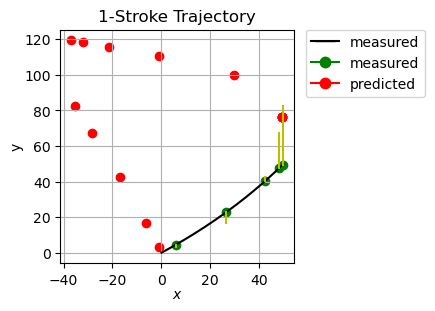

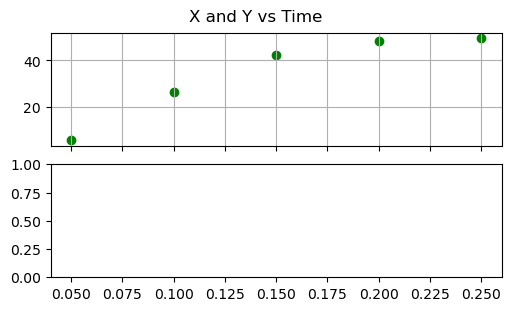

In [6]:
# attempted with exact values
# X = [-0.835389,     3.40436,     -6.23069,     16.8247,     -17.0567,     42.4051,     -28.1828,     67.062,     -35.437,     82.364,     11.5745,     80.0044,     35.9072,     74.8226,     57.9287,
#      74.2873,     68.7373,     75.4183,     72.0891,     75.9557,     29.7225,     100.002,     -0.766354,     110.366,     -21.2513,     115.89,     -32.0648,     118.36,     -36.91,     119.37]
# V = [211.451,    737.689,     998.793,     761.362,     402.142,     1041.04,     1294.93,
#      810.278,     300.635,     74.5424,     1195.18,     918.359,     530.372,     252.908,     105.788]

# attempted variation
X = [-0.83861135006, 3.41241734366, -6.22765267873, 16.8174574145, -17.0573075387, 42.4066923998, -28.1860826565,  67.068871712, -35.4331974746, 82.3554254406, 49.1843717118, 76.1307719482, 49.2179500356, 76.1275613553, 49.2486796628,
     76.1246807655, 49.2770070312, 76.1220741235, 49.3032811719, 76.1196982134, 29.7535156934, 99.9910090098, -0.845068603928,  110.388742014, -21.1979999277, 115.876349562, -32.0179955421, 118.350241157, -36.9612259136, 119.380426912]
V = [210.747509653, 737.536153687, 999.295476871, 761.169523873, 401.361347481, 1.73916547855, 1.58719180993,
     1.45966688992, 1.35112852475, 1.25762906854, 1215.48646225, 914.031303682, 527.661411285, 255.241314343, 109.444237653]

Xx = []
Xy = []
for i in range(len(X)):
    if i % 2 == 0:
        Xx.append(X[i])
    else:
        Xy.append(X[i])

blk_ln = mlines.Line2D([], [], color='black', marker='_',
                       markersize=15, label='measured')
green_pt = mlines.Line2D([], [], color='green', marker='.',
                         markersize=15, label='measured')
red_pt = mlines.Line2D([], [], color='red', marker='.',
                       markersize=15, label='predicted')
yellow_ln = mlines.Line2D([], [], color='yellow', marker='_',
                          markersize=15, label='error')

fig, ax = plt.subplots()
plt.title('1-Stroke Trajectory')
plt.grid(visible=1)
plt.plot(trajectory[0, :], trajectory[1, :], c='k')
plt.scatter(px, py, c='g')
plt.scatter(Xx, Xy, c='r')
for i in range(len(px)):
    lineXdata = (px[i], px[i])  # same X
    lineYdata = (py[i], Xy[i])  # different Y
    plt.plot(lineXdata, lineYdata, c='y')
plt.xlabel('$x$', labelpad=0)
plt.ylabel('y', labelpad=0)
ax.set_box_aspect(1)
plt.legend(handles=[blk_ln, green_pt, red_pt],
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('X and Y vs Time')
axs[0].grid()
axs[0].scatter(tm, px, c='g')
axs[0].scatter(tm, Xx, c='r')
for i in range(len(px)):
    lineXdata = (tm[i], tm[i])  # same X
    lineYdata = (px[i], Xx[i])  # different Y
    axs[0].plot(lineXdata, lineYdata, c='y')
axs[0].set(xlabel='$t$', ylabel='x')
axs[1].grid()
axs[1].scatter(tm, py, c='g')
axs[1].scatter(tm, Xy, c='r')
for i in range(len(py)):
    lineXdata = (tm[i], tm[i])  # same X
    lineYdata = (py[i], Xy[i])  # different Y
    axs[1].plot(lineXdata, lineYdata, c='y')
axs[1].set(xlabel='$t$', ylabel='y')
plt.legend(handles=[green_pt, red_pt, yellow_ln],
           loc='right')

fig, ax = plt.subplots()
plt.title('Speed Profile')
plt.grid(visible=1)
for i, s in enumerate(strokes):
    plt.fill_between(t, 0, s, where=s > 0, facecolor='grey', alpha=0.5)
plt.plot(t, velocity, 'k')
plt.scatter(tm, v, c='g')
plt.scatter(tm, V, c='r')
for i in range(len(px)):
    lineXdata = (tm[i], tm[i])  # same X
    lineYdata = (v[i], V[i])  # different Y
    plt.plot(lineXdata, lineYdata, c='y')
plt.xlabel('$t$', labelpad=0)
plt.ylabel('speed', labelpad=0)
ax.set_box_aspect(1)
plt.legend(handles=[blk_ln, green_pt, red_pt, yellow_ln],
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
